In [62]:
############ Imports ###############
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [63]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)
df_train['is_Train'] = 1
df_test ['is_Train'] = 0

(131662, 14) (87395, 13)


In [64]:
data = pd.concat([df_train,df_test] , axis= 0 , sort=False)
print(data.shape)

(219057, 15)


In [65]:
data.head

<bound method NDFrame.head of            Trip_ID  Trip_Distance Type_of_Cab  Customer_Since_Months  \
0      T0005689460           6.77           B                    1.0   
1      T0005689461          29.47           B                   10.0   
2      T0005689464          41.58         NaN                   10.0   
3      T0005689465          61.56           C                   10.0   
4      T0005689467          54.95           C                   10.0   
...            ...            ...         ...                    ...   
87390  T0005908503          29.43           C                    3.0   
87391  T0005908504          14.83           C                   10.0   
87392  T0005908505          37.86           A                    6.0   
87393  T0005908511          10.63           C                    1.0   
87394  T0005908515          37.96           B                   10.0   

       Life_Style_Index Confidence_Life_Style_Index Destination_Type  \
0               2.42769          

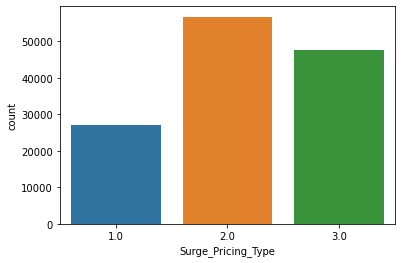

In [66]:
sns.countplot(data["Surge_Pricing_Type"])

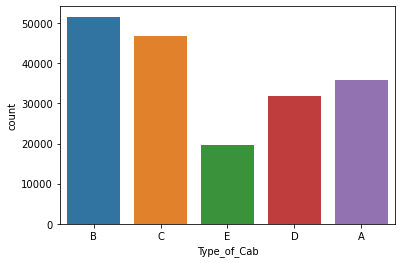

In [67]:
sns.countplot(data["Type_of_Cab"])
plt.show()

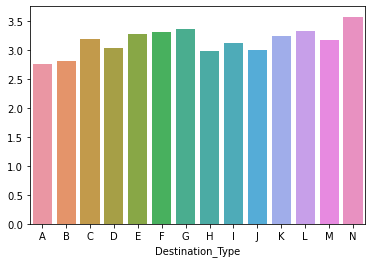

In [68]:
x = data.groupby("Destination_Type")["Customer_Rating"].mean().index
y= data.groupby("Destination_Type")["Customer_Rating"].mean().values
sns.barplot(x,y)

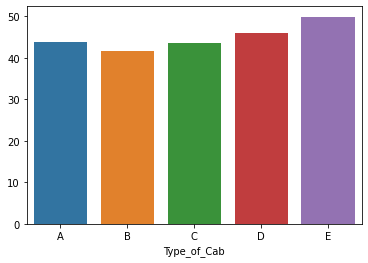

In [69]:
x = data.groupby("Type_of_Cab")["Trip_Distance"].mean().index
y= data.groupby("Type_of_Cab")["Trip_Distance"].mean().values
sns.barplot(x,y)

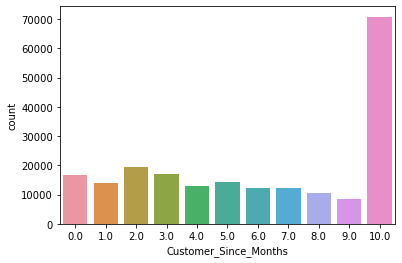

In [70]:
sns.countplot(data["Customer_Since_Months"])

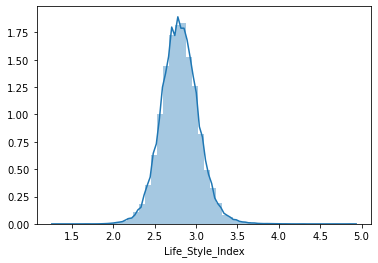

In [71]:
sns.distplot(data["Life_Style_Index"])

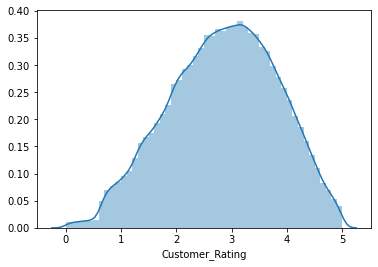

In [72]:
sns.distplot(data["Customer_Rating"])

In [73]:
data.isna().sum() 

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                     33368
Customer_Since_Months            9886
Life_Style_Index                33520
Confidence_Life_Style_Index     33520
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Var1                           117819
Var2                                0
Var3                                0
Gender                              0
Surge_Pricing_Type              87395
is_Train                            0
dtype: int64

In [74]:
### Some of the random imputation below can be replaced by ML based imputation methods
data['Type_of_Cab'].fillna(pd.Series(np.random.choice(['B','C','A'], size=len(data.index))),inplace=True)
data['Customer_Since_Months'].fillna(data['Customer_Since_Months'].median() , inplace=True)
data['Life_Style_Index'].fillna(data['Life_Style_Index'].mean() , inplace=True)
data['Confidence_Life_Style_Index'].fillna(pd.Series(np.random.choice(['B','C','A'], size=len(data.index))),inplace=True)
data['Var1'].fillna(data['Var1'].mean() , inplace=True)

In [75]:
data.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type', 'is_Train'],
      dtype='object')

In [76]:
for col_name in data.columns :
    print("Number of unique entries for " , col_name , " are ",data[col_name].nunique(dropna=True))

Number of unique entries for  Trip_ID  are  219057
Number of unique entries for  Trip_Distance  are  10594
Number of unique entries for  Type_of_Cab  are  5
Number of unique entries for  Customer_Since_Months  are  11
Number of unique entries for  Life_Style_Index  are  69678
Number of unique entries for  Confidence_Life_Style_Index  are  3
Number of unique entries for  Destination_Type  are  14
Number of unique entries for  Customer_Rating  are  3976
Number of unique entries for  Cancellation_Last_1Month  are  9
Number of unique entries for  Var1  are  131
Number of unique entries for  Var2  are  61
Number of unique entries for  Var3  are  102
Number of unique entries for  Gender  are  2
Number of unique entries for  Surge_Pricing_Type  are  3
Number of unique entries for  is_Train  are  2


In [77]:
# disable chained assignments
pd.options.mode.chained_assignment = None 
## take columns to be one hot encoded
data_num = data [['Trip_Distance','Customer_Since_Months','Life_Style_Index','Customer_Rating', 'Cancellation_Last_1Month', 
                  'Var1', 'Var2', 'Var3','Surge_Pricing_Type', 'is_Train']]
data_cat = data [['Type_of_Cab','Confidence_Life_Style_Index','Gender','Destination_Type']]

# integer encode
label_encoder = LabelEncoder()
# apply "le.fit_transform"
integer_encoded = data_cat.apply(label_encoder.fit_transform)
print("Integer Encoded",integer_encoded[1:10])
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded[['Type_of_Cab', 'Confidence_Life_Style_Index', 'Gender','Destination_Type']])
print("One Hot Encoded",onehot_encoded[1:10])
# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

Integer Encoded    Type_of_Cab  Confidence_Life_Style_Index  Gender  Destination_Type
1            1                            1       1                 0
2            1                            1       1                 4
3            2                            2       1                 0
4            2                            1       1                 0
5            4                            1       1                 0
6            4                            2       1                 1
7            1                            1       1                 0
8            2                            0       1                 0
9            3                            1       1                 0
One Hot Encoded [[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.

In [49]:
integer_encoded.columns

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Gender',
       'Destination_Type'],
      dtype='object')

In [79]:
onehot_encoder.get_feature_names(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Gender','Destination_Type'])

array(['Type_of_Cab_0', 'Type_of_Cab_1', 'Type_of_Cab_2', 'Type_of_Cab_3',
       'Type_of_Cab_4', 'Confidence_Life_Style_Index_0',
       'Confidence_Life_Style_Index_1', 'Confidence_Life_Style_Index_2',
       'Gender_0', 'Gender_1', 'Destination_Type_0', 'Destination_Type_1',
       'Destination_Type_2', 'Destination_Type_3', 'Destination_Type_4',
       'Destination_Type_5', 'Destination_Type_6', 'Destination_Type_7',
       'Destination_Type_8', 'Destination_Type_9', 'Destination_Type_10',
       'Destination_Type_11', 'Destination_Type_12',
       'Destination_Type_13'], dtype=object)

In [51]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_num[['Trip_Distance','Customer_Since_Months','Life_Style_Index','Customer_Rating',
                                                  'Cancellation_Last_1Month','Var1','Var2','Var3']])
df = pd.DataFrame(x_scaled)
data_num['Trip_Distance'] = df[0].values
data_num['Customer_Since_Months'] = df[1].values
data_num['Life_Style_Index'] = df[2].values
data_num['Customer_Rating'] = df[3].values
data_num['Cancellation_Last_1Month'] = df[4].values
data_num['Var1'] = df[5].values
data_num['Var2'] = df[6].values
data_num['Var3'] = df[7].values

In [52]:
print(type(onehot_encoded))
data_cat = pd.DataFrame(onehot_encoded,columns=onehot_encoder.get_feature_names(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Gender','Destination_Type']))
data_cat.reset_index(inplace=True, drop=True)
data_num.reset_index(inplace=True, drop=True)
data_final = pd.concat([data_num,data_cat], axis=1)
print(data_final.shape)

<class 'numpy.ndarray'>
(219057, 34)


In [55]:
#### Interesting creation of new features ####
data["Trip_Distance_per_destType"] = data["Trip_Distance"]/data.groupby(['Destination_Type'])['Trip_Distance'].transform('mean')
data["Trip_Distance_per_CabType"] = data["Trip_Distance"]/data.groupby(['Type_of_Cab'])['Trip_Distance'].transform('mean')
data["Trip_Distance_per_lifeStyle"] = data["Trip_Distance"]/data.groupby(['Confidence_Life_Style_Index'])['Trip_Distance'].transform('mean')

In [56]:
data_final[data_final.is_Train == 1].to_csv('train_final.csv', index=False , header=True)
data_final[data_final.is_Train == 0].to_csv('test_final.csv',index=False , header=True)
print("Done Writing to files")

Done Writing to files


In [58]:
data_final.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'is_Train', 'x0_0', 'x0_1', 'x0_2', 'x0_3',
       'x0_4', 'x1_0', 'x1_1', 'x1_2', 'x2_0', 'x2_1', 'x3_0', 'x3_1', 'x3_2',
       'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8', 'x3_9', 'x3_10',
       'x3_11', 'x3_12', 'x3_13'],
      dtype='object')